Dataset ini biasanya digunakan untuk **memprediksi biaya asuransi berdasarkan sejumlah fitur lainnya**. Ini adalah contoh dataset yang umumnya digunakan dalam analisis data, sehingga deskripsi berikut mungkin mencakup beberapa aspek umum dari dataset ini:

1. Kolom Data: Dataset ini biasanya terdiri dari beberapa kolom yang mewakili
berbagai atribut atau fitur. Beberapa kolom umum yang biasanya ada dalam dataset asuransi mencakup:

- **age**: Usia.
- **sex**: Jenis kelamin.
- **bmi**: Indeks Massa Tubuh (BMI).
- **children**: Jumlah anak/anak-anak dalam tanggungan.
- **smoker**: Status perokok.
- **region**: Wilayah tempat tinggal atau terdaftar.
- **charges**: Biaya asuransi yang dibayarkan.

Tujuan Analisis: Tujuan umum dari analisis dataset ini adalah untuk memahami faktor-faktor apa yang mempengaruhi biaya asuransi (charges) dan apakah kita dapat memprediksi biaya asuransi berdasarkan atribut-atribut lainnya seperti usia, jenis kelamin, BMI, jumlah anak, status perokok, dan wilayah tempat tinggal.

1. Tipe Data: Sebagian besar kolom dalam dataset ini termasuk data numerik seperti usia (age), BMI, jumlah anak (children), dan biaya asuransi (charges). Namun, kolom 'sex', 'smoker', dan 'region' adalah kolom kategorikal yang biasanya mengandung data dalam bentuk teks atau kategori.

2. Potensi Insight: Analisis data pada dataset ini dapat menghasilkan beberapa wawasan, seperti pengaruh usia, status perokok, atau BMI terhadap biaya asuransi. Anda juga dapat melakukan regresi untuk memprediksi biaya asuransi berdasarkan atribut-atribut ini.

3. Machine Learning: Dataset ini sering digunakan dalam proyek pembelajaran mesin, seperti regresi linier untuk memprediksi biaya asuransi atau klasifikasi untuk memprediksi apakah seseorang adalah perokok atau bukan.

4. Visualisasi: Anda dapat menggunakan visualisasi data seperti scatter plot, box plot, histogram, dan lainnya untuk memahami hubungan antara variabel dalam dataset ini.

5. Praktik Bisnis: Data kasus nyata yang sering digunakan dalam industri asuransi untuk penilaian risiko dan penetapan premi. Analisis data ini dapat membantu perusahaan asuransi dalam pengambilan keputusan yang lebih baik dan pemahaman terhadap pelanggan.

##Import Library##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Dataset##

In [ ]:
# Load data
data = pd.read_csv('health insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


# Exploratory Data Analysis

In [ ]:
# Cek tipe data
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Cek dimensi data
data.shape

(1338, 7)

Dataset kita mempunyai 7 kolom dan 1338 baris

In [ ]:
# Cek statistik deskriptif data
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


##Cek Missing Value dan Data Duplikat##

In [ ]:
# cek missing value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak ada nilai kosong dalam dataset

In [ ]:
# Cek data duplikat
data.duplicated().sum()

1

Terdapat 1 data duplikat dalam dataset kita, maka kita akan menghapusnya

In [ ]:
# drop data duplikat
data.drop_duplicates(inplace=True)

In [ ]:
# Cek data unik di kolom region
region = data['region'].unique()
print(region)

['southwest' 'southeast' 'northwest' 'northeast']


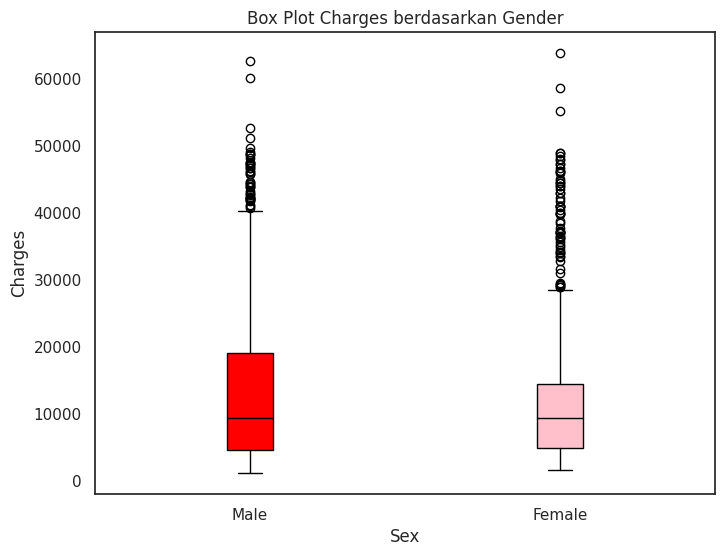

In [ ]:
# Membuat boxplot
plt.figure(figsize=(8, 6))

# Menggunakan boxplot untuk memvisualisasikan distribusi charges berdasarkan gender
boxplot = plt.boxplot([data[data['sex'] == 'male']['charges'], data[data['sex'] == 'female']['charges']],
            labels=['Male', 'Female'], patch_artist=True)

# Menentukan warna kotak dan whisker
colors = ['red', 'pink']

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Menentukan warna median line
for median in boxplot['medians']:
    median.set(color='black')

plt.title('Box Plot Charges berdasarkan Gender')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

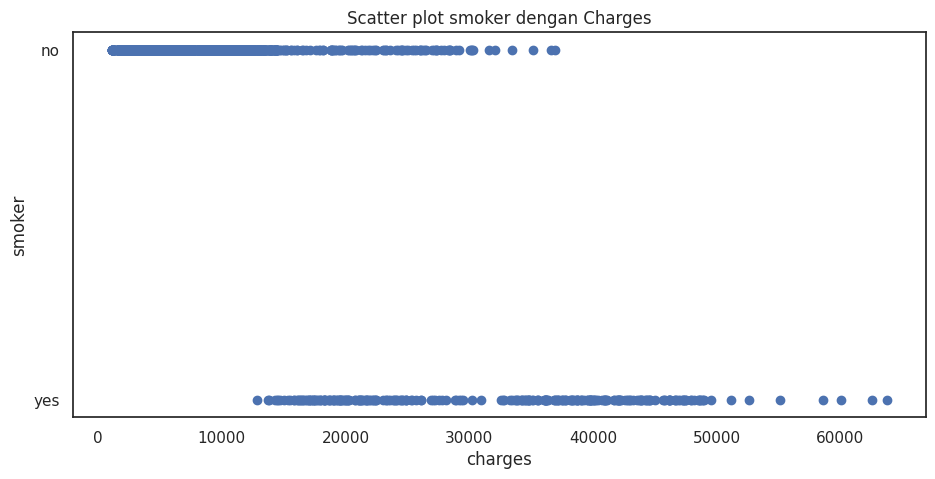

In [ ]:
# Visualisasi korelasi smoker dengan charges menggunakan scatter plot
plt.figure(1, figsize=(11, 5))
plt.title('Scatter plot smoker dengan Charges', fontsize=12)
plt.xlabel('charges')
plt.ylabel('smoker')
plt.scatter(x=data['charges'], y=data['smoker'])
plt.show()

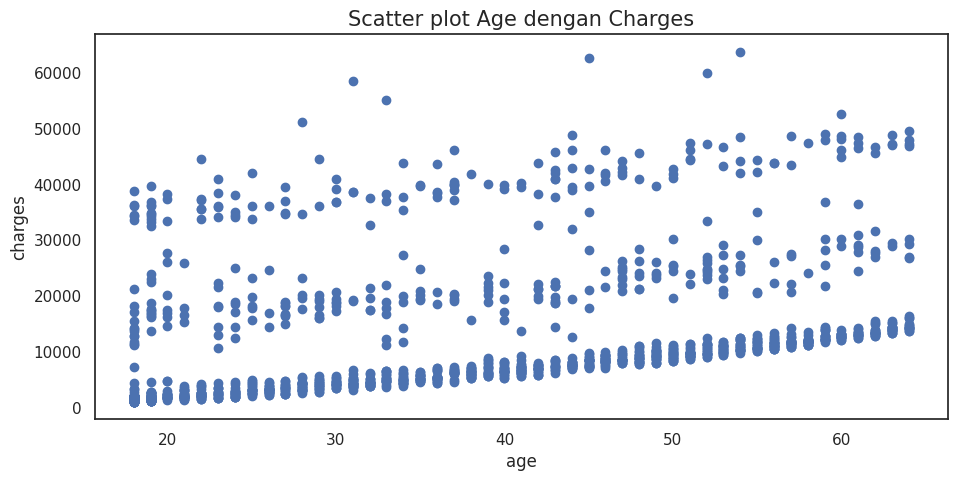

In [ ]:
# Visualisasi korelasi umur dengan charges menggunakan scatter plot
plt.figure(1, figsize=(11, 5))
plt.title('Scatter plot Age dengan Charges', fontsize=15)
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(x=data['age'], y=data['charges'])
plt.show()

Dapat disimpulkan bahwa semakin tinggi umur ( age ) maka charges semakin tinggi juga

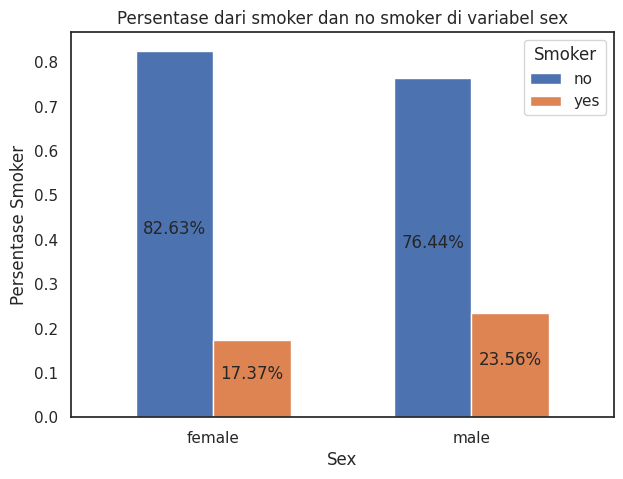

In [ ]:
# Mencari Persentase status smoker di kolom sex
sns.set(style="white")

# Menghitung kemunculan smoker dan no smoker berdasarkan jenis kelamin
smoker_counts = data.groupby(['sex', 'smoker']).size().unstack()

# Kalkulasi Persentase
smoker_percentages = smoker_counts.div(smoker_counts.sum(axis=1), axis=0)

# Plot bar chart
ax = smoker_percentages.plot(kind='bar', figsize=(7, 5), width=0.6)

# Tambahkan label dan Title
plt.title("Persentase dari smoker dan no smoker di variabel sex")
plt.ylabel("Persentase Smoker")
plt.xlabel("Sex")

# Menambahkan label persentase pada setiap bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(title='Smoker', bbox_to_anchor=(1, 1))
plt.show()

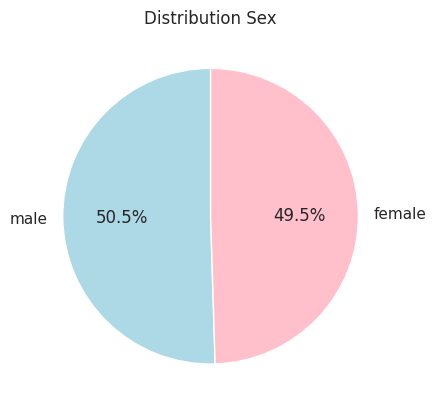

In [ ]:
# Distribusi dari kolom Sex
counts = data['sex'].value_counts()
labels = counts.index
values = counts.values
colors = ['lightblue', 'pink']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution Sex')
plt.show()

<Axes: xlabel='bmi'>

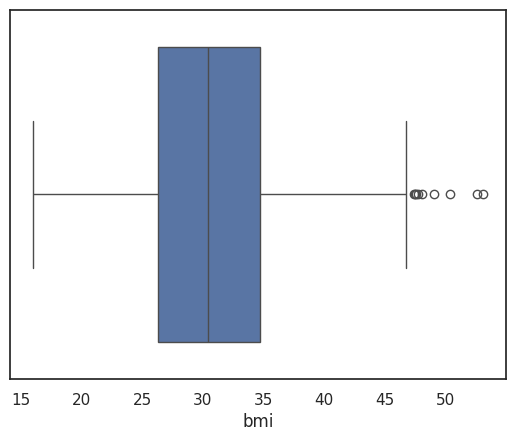

In [ ]:
# Box Plot BMI
sns.boxplot(x = data['bmi'])

<Axes: xlabel='children'>

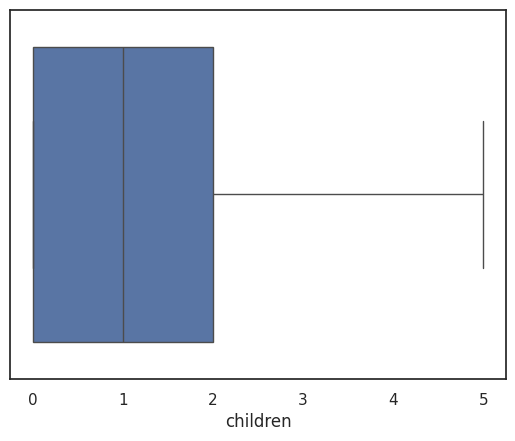

In [ ]:
# Box Plot Children
sns.boxplot(x = data['children'])

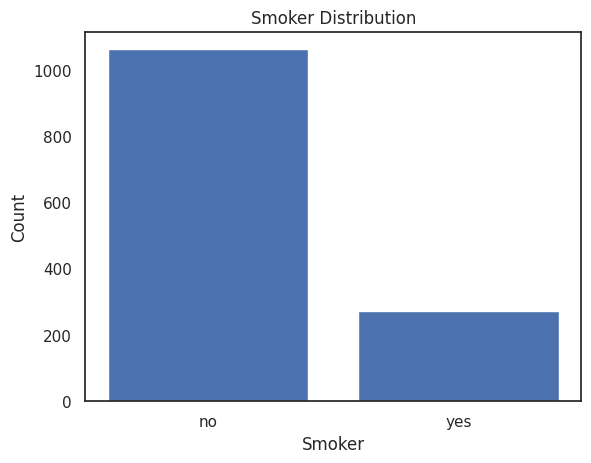

In [ ]:
# Distribusi Kolom Smoker
counts = data['smoker'].value_counts()
labels = counts.index
values = counts.values
plt.bar(labels, values)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Terdapat data Imbalance di kolom smokers

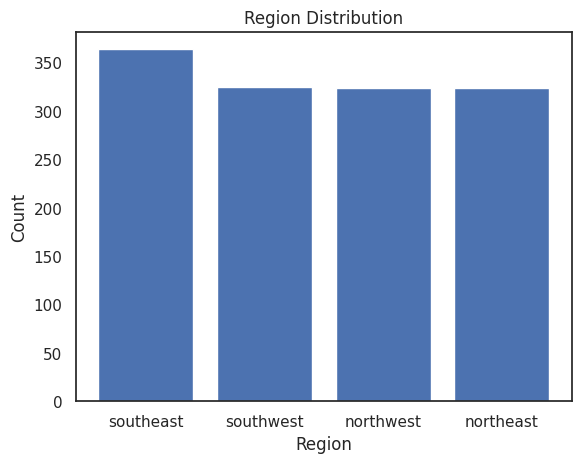

In [ ]:
# distribusi kolom Region
counts = data['region'].value_counts()
labels = counts.index
values = counts.values
plt.bar(labels, values)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='charges'>

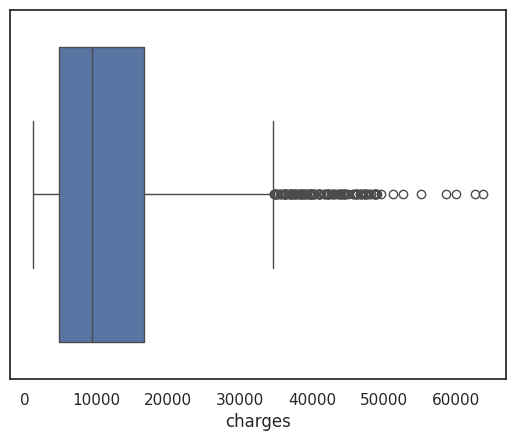

In [ ]:
# Box Plot Charges
sns.boxplot(x = data['charges'])

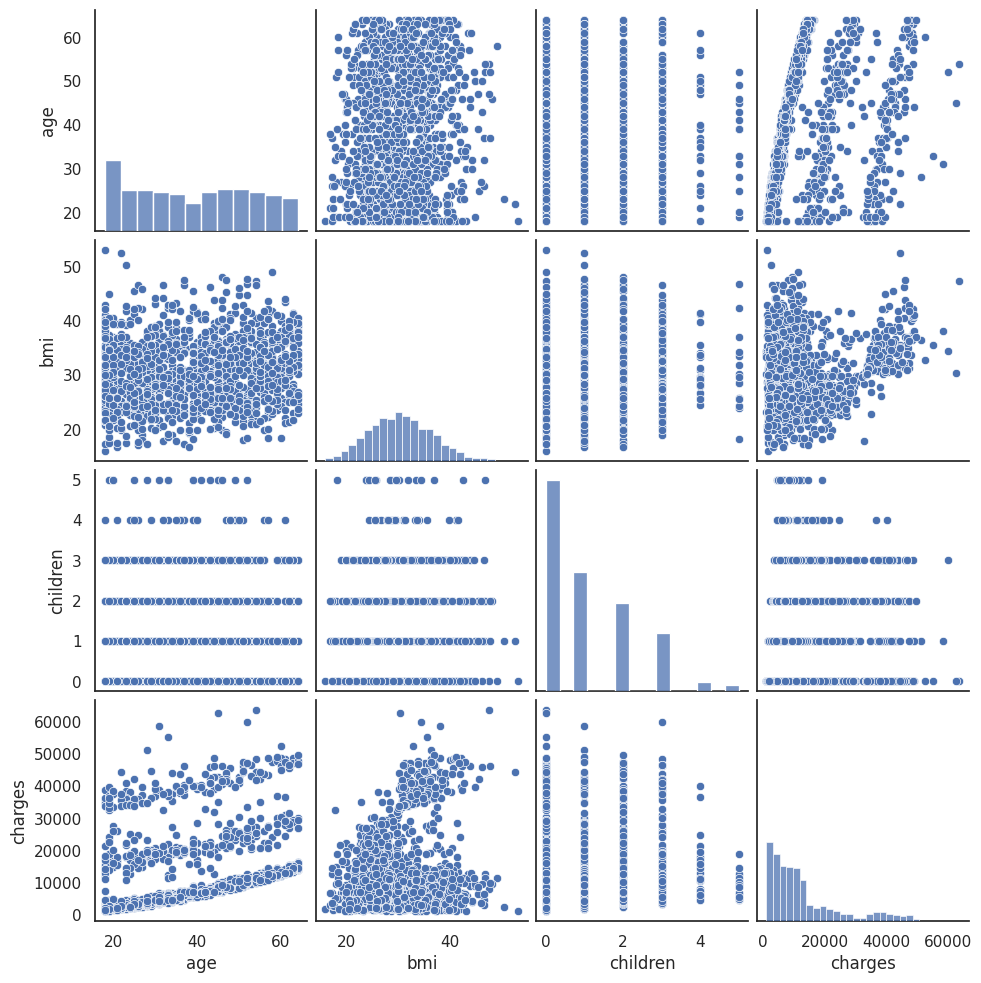

In [ ]:
sns.pairplot(data)

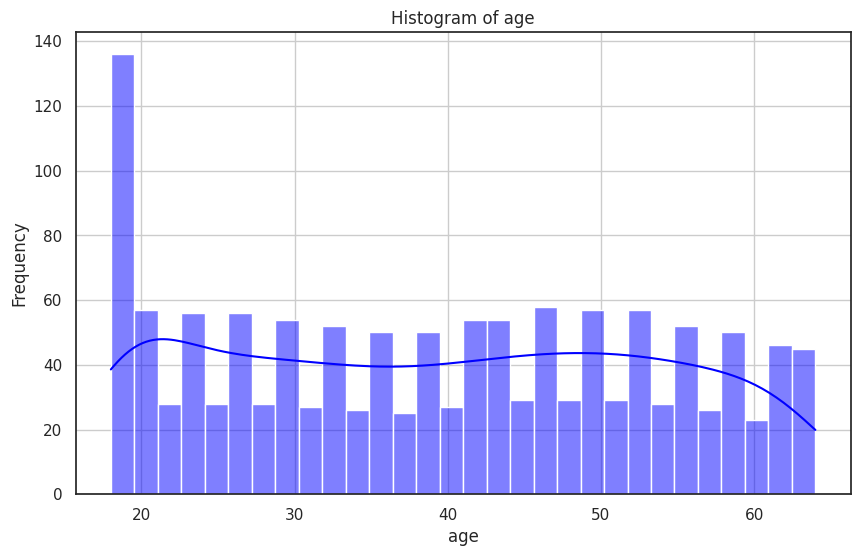

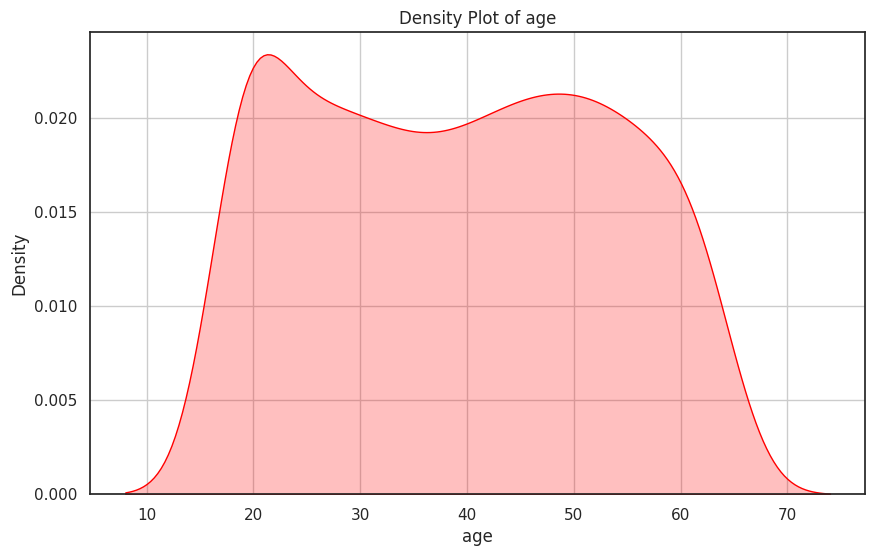

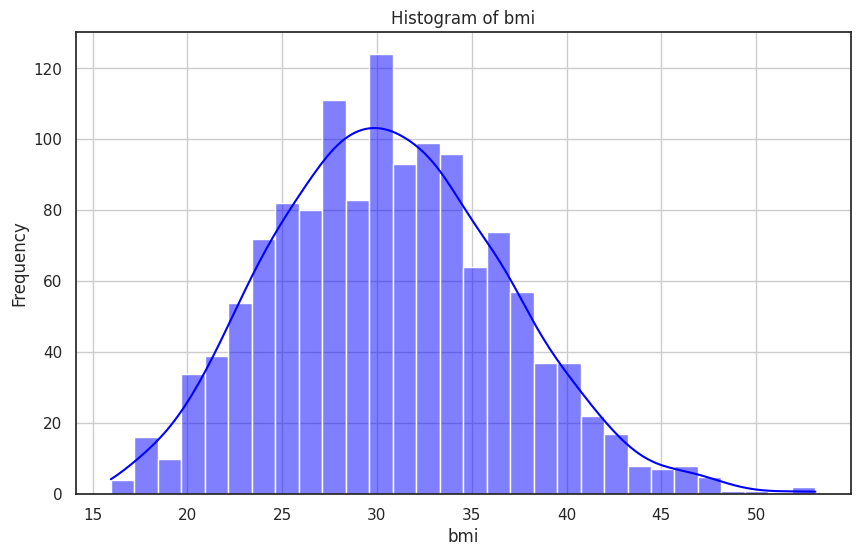

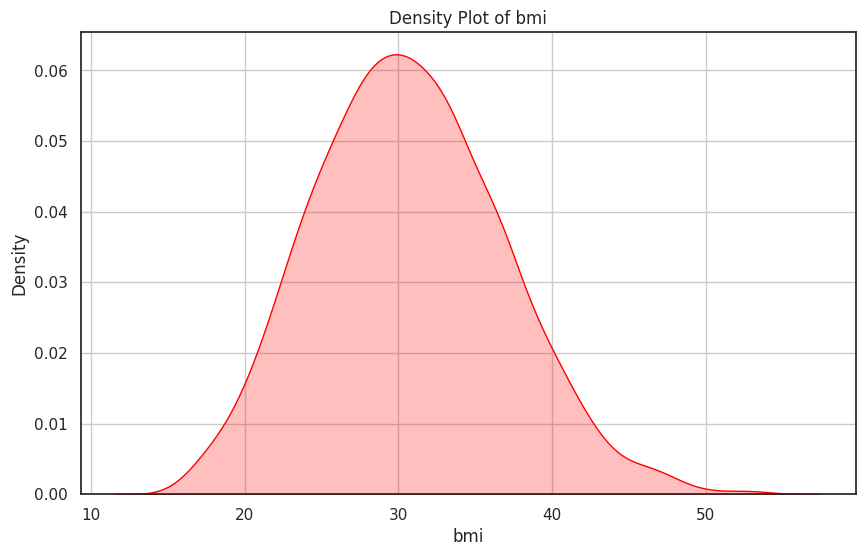

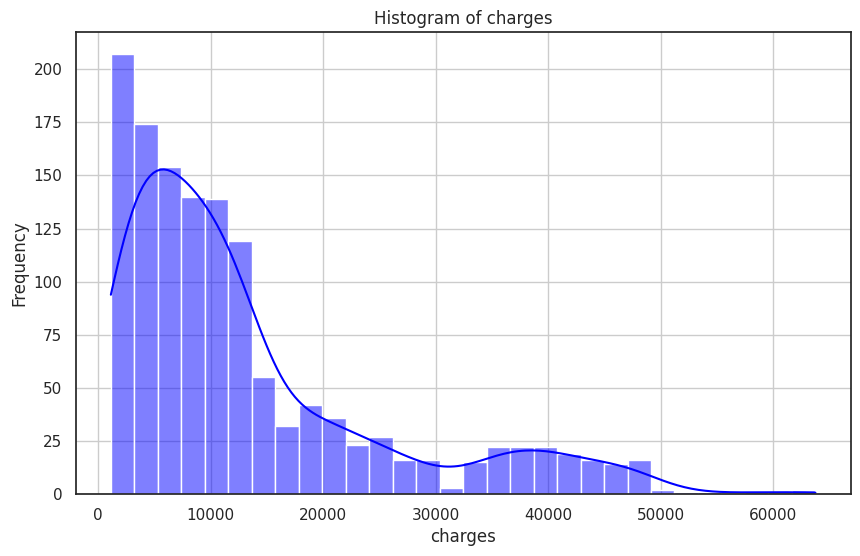

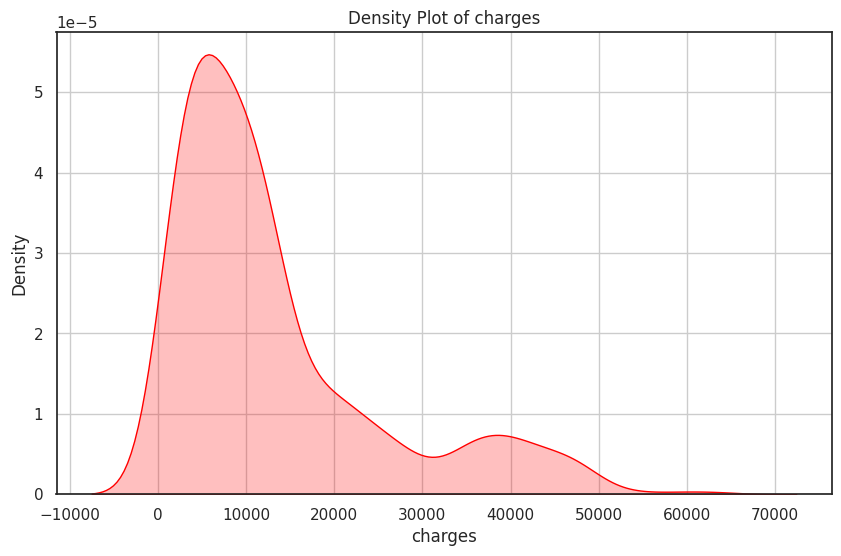

In [ ]:
# Pilih kolom yang ingin Anda visualisasikan distribusinya
columns_to_visualize = ['age', 'bmi', 'charges']

for column_to_visualize in columns_to_visualize:
    # Buat histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_to_visualize], kde=True, color='blue', bins=30)
    plt.title('Histogram of ' + column_to_visualize)
    plt.xlabel(column_to_visualize)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Buat density plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data[column_to_visualize], color='red', shade=True)
    plt.title('Density Plot of ' + column_to_visualize)
    plt.xlabel(column_to_visualize)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

Dapat dilihat bahwa data kita ada yang tidak berdistribusi normal, maka kita harus handling data tersebut sebelum modelling. Kita akan menggunakan Uji Jarque-Bera karena uji ini memeriksa apakah sampel data memiliki kurtosis dan skewness yang sesuai dengan distribusi normal. Jika nilai p yang dihasilkan lebih besar dari tingkat signifikansi yang ditentukan, maka distribusi data dianggap berasal dari distribusi normal.

## Uji Normalitas Data

In [ ]:
from scipy import stats

# Persiapkan data contoh
data_uji = data[['bmi','charges']]

# Melakukan uji Jarque-Bera
jb_test_statistic, jb_p_value = stats.jarque_bera(data_uji)

# Print hasil uji
print("Jarque-Bera Test Statistic:", jb_test_statistic)
print("P-value:", jb_p_value)

# Cek apakah data termasuk distribusi normal atau tidak
alpha = 0.05
if jb_p_value > alpha:
    print("Data termasuk distribusi normal (tidak dapat menolak nol hipotesis)")
else:
    print("Data tidak termasuk distribusi normal (menolak nol hipotesis)")

Jarque-Bera Test Statistic: 4666.063438168553
P-value: 0.0
Data tidak termasuk distribusi normal (menolak nol hipotesis)


Rumus Jarque-Bera Test

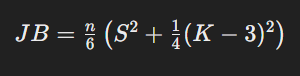

- n adalah jumlah observasi dalam sampel.
- S adalah skewness sampel.
- K adalah kurtosis sampel.
Nilai JB yang besar menunjukkan bahwa skewness dan kurtosis dari sampel tersebut sangat berbeda dari distribusi normal.

Nilai JB kemudian dibandingkan dengan distribusi chi-squared dengan dua derajat kebebasan, karena skewness dan kurtosis independen satu sama lain. Jadi, jika nilai JB lebih besar dari kuantil chi-squared pada tingkat signifikansi tertentu (misalnya 0.05), kita menolak hipotesis nol dan menyimpulkan bahwa distribusi tidak normal.

- **Jarque-Bera Test Statistic**: Statistik uji ini menunjukkan besarnya deviasi dari distribusi data terhadap distribusi normal. Semakin besar nilainya, semakin besar pula deviasi tersebut.
- **P-value**: Nilai p-value adalah probabilitas untuk mengamati hasil uji statistik yang ekstrem seperti yang diamati, jika asumsi nol hipotesis benar. Dalam konteks ini, nol hipotesisnya adalah bahwa data berasal dari distribusi normal. Nilai p-value yang sangat kecil (0.0 dalam kasus ini) menunjukkan bahwa kemungkinan mengamati statistik uji yang se-atau lebih ekstrem daripada yang diamati, jika data berasal dari distribusi normal, sangatlah rendah.
  
Jika kita menetapkan tingkat signifikansi alpha sebesar 0.05, maka nilai p-value yang sangat rendah (0.0) jauh lebih kecil dari alpha. Oleh karena itu, kita menolak nol hipotesis bahwa data berasal dari distribusi normal.

Kesimpulannya, hasil output tersebut menunjukkan bahwa data kita tidak terdistribusi secara normal. Hal ini ditandai dengan nilai p-value yang sangat rendah (0.0), yang menyebabkan kita menolak hipotesis nol, yaitu bahwa data berasal dari distribusi normal.

# Feature Engineering##

## Handling Distribusi Data

In [ ]:
from scipy.stats import boxcox

# Handling kolom 'bmi' dan 'charges' yang left-skewed
columns_to_transform = ['bmi', 'charges']

for column in columns_to_transform:
    # Transformasi Log
    data[column + '_log'] = np.log(data[column] + 1)

    # Transformasi Box-Cox
    data[column + '_boxcox'], _ = boxcox(data[column] + 1)

    # Transformasi Akar Kuadrat
    data[column + '_sqrt'] = np.sqrt(data[column])

# Menampilkan data setelah transformasi
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_log,bmi_boxcox,bmi_sqrt,charges_log,charges_boxcox,charges_sqrt
0,19,female,27.90,0,yes,southwest,16884.92,3.36,7.76,5.28,9.73,12.11,129.94
1,18,male,33.77,1,no,southeast,1725.55,3.55,8.61,5.81,7.45,8.80,41.54
2,28,male,33.00,3,no,southeast,4449.46,3.53,8.51,5.74,8.40,10.14,66.70
3,33,male,22.70,0,no,northwest,21984.47,3.17,6.92,4.76,10.00,12.52,148.27
4,32,male,28.88,0,no,northwest,3866.86,3.40,7.91,5.37,8.26,9.93,62.18


## Membandingkan Metode Handling Distribusi Data

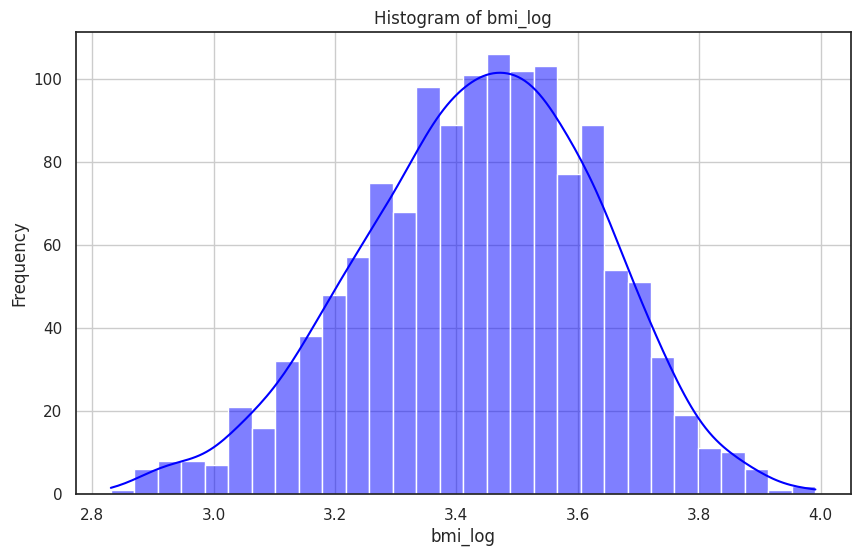

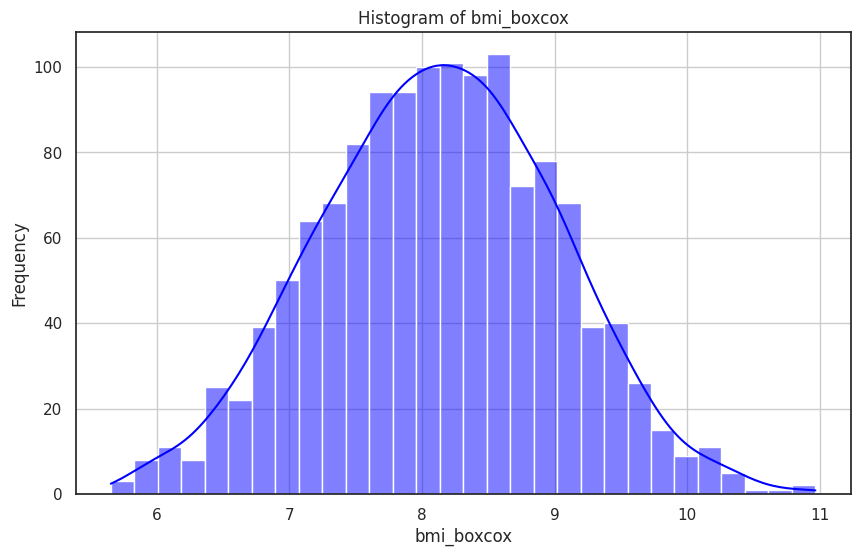

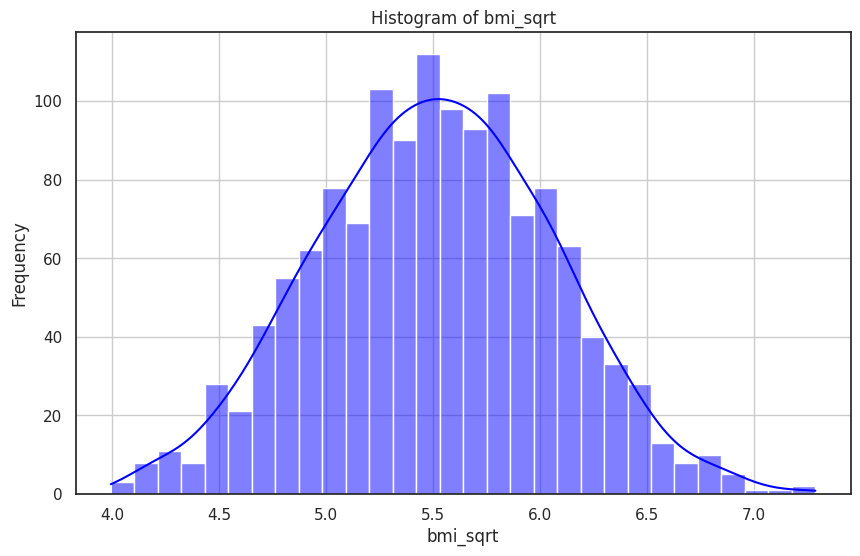

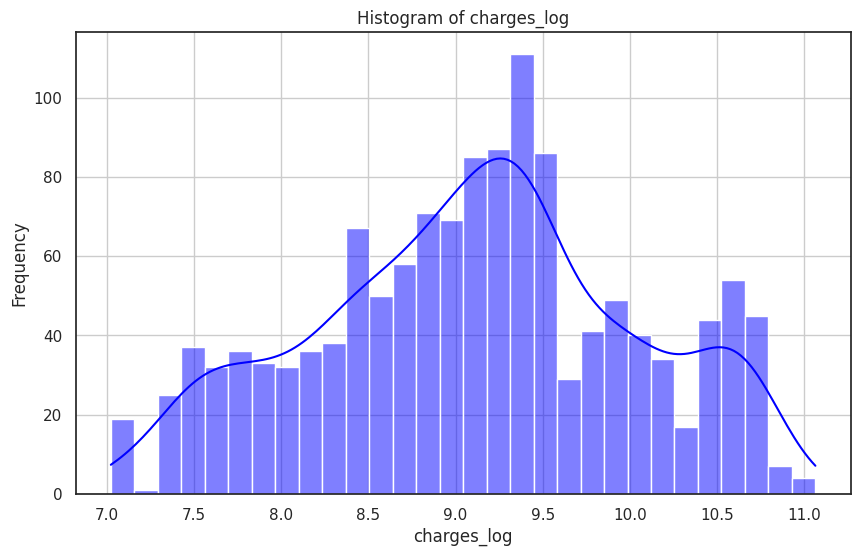

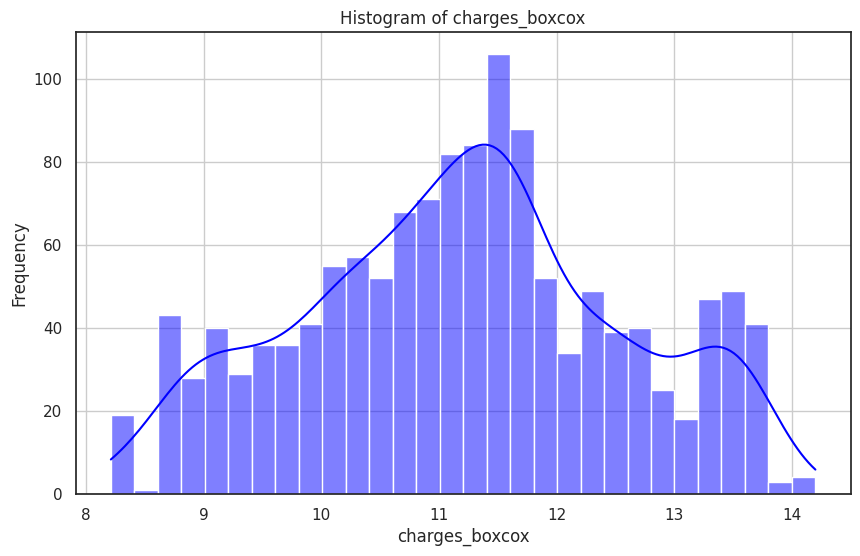

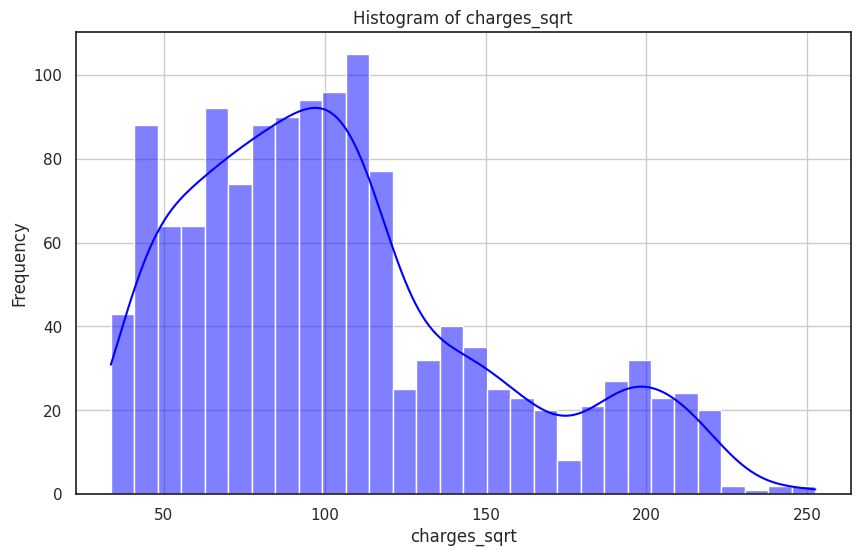

In [ ]:
columns_to_visualize = ['bmi_log', 'bmi_boxcox','bmi_sqrt', 'charges_log','charges_boxcox','charges_sqrt']

for column_to_visualize in columns_to_visualize:
    # Buat histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_to_visualize], kde=True, color='blue', bins=30)
    plt.title('Histogram of ' + column_to_visualize)
    plt.xlabel(column_to_visualize)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Rumus Transformasi Log:

**y = log(x+1)**


Di mana x adalah nilai asli, dan y adalah nilai yang telah ditransformasi.
Transformasi ini menggunakan logaritma natural dengan penambahan 1 pada nilai asli untuk menghindari nilai-nilai yang bernilai nol.

Rumus Transformasi Boxcox:

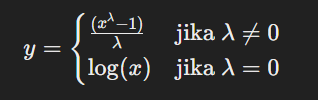

Di mana **x** adalah nilai asli, **y** adalah nilai yang telah ditransformasi, dan **λ** adalah parameter transformasi yang diperoleh dari proses estimasi.

Transformasi ini memperhitungkan nilai-nilai negatif dan nol serta menyesuaikan parameter **λ** untuk memaksimalkan normalitas data.

Rumus SQRT:

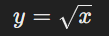

Di mana **x** adalah nilai asli, dan **y** adalah nilai yang telah ditransformasi.

Transformasi ini cukup sederhana dan hanya mengambil akar kuadrat dari nilai asli.

Dari output tersebut bisa disimpulkan bahwa metode handling distribusi data lebih baik menggunakan *Boxcox* karena datanya mendekati distribusi normal

In [ ]:
data_baru = data[['age','sex','bmi_boxcox','children','smoker','region','charges_boxcox']]
data_baru.head()

,age,sex,bmi_boxcox,children,smoker,region,charges_boxcox
0,19,female,7.76,0,yes,southwest,12.11
1,18,male,8.61,1,no,southeast,8.80
2,28,male,8.51,3,no,southeast,10.14
3,33,male,6.92,0,no,northwest,12.52
4,32,male,7.91,0,no,northwest,9.93


##Handling Data Outliers##

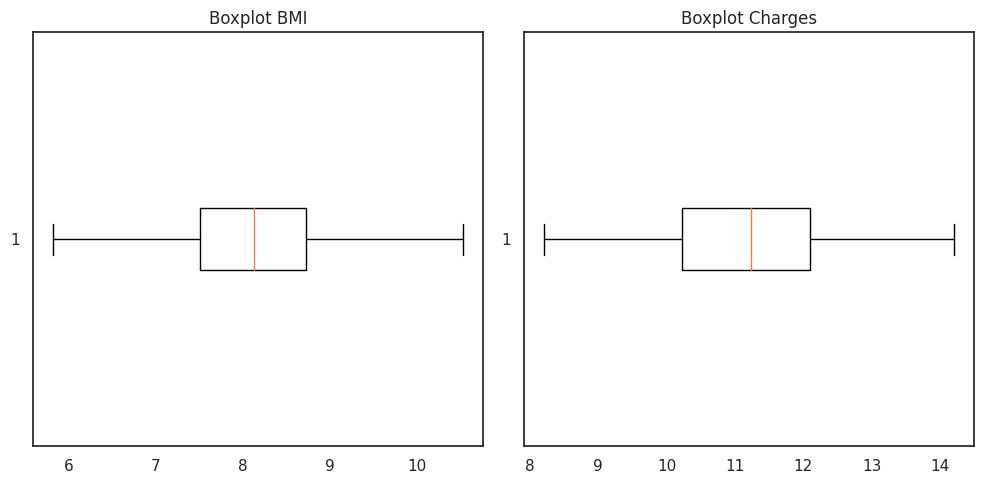

In [ ]:
# Menghitung nilai Q1 (kuartil 25) dan Q3 (kuartil 75)
Q1 = data_baru['bmi_boxcox'].quantile(0.25)
Q3 = data_baru['bmi_boxcox'].quantile(0.75)

# Menghitung rentang IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai NaN
data_baru['bmi_boxcox'] = np.where((data_baru['bmi_boxcox'] < lower_bound) | (data_baru['bmi_boxcox'] > upper_bound), np.nan, data_baru['bmi_boxcox'])

# Menghapus baris yang mengandung nilai NaN
data_baru.dropna(subset=['bmi_boxcox'], inplace=True)

# Mengulangi proses yang sama untuk kolom "charges"
Q1 = data_baru['charges_boxcox'].quantile(0.25)
Q3 = data_baru['charges_boxcox'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_baru['charges_boxcox'] = np.where((data_baru['charges_boxcox'] < lower_bound) | (data_baru['charges_boxcox'] > upper_bound), np.nan, data_baru['charges_boxcox'])
data_baru.dropna(subset=['charges_boxcox'], inplace=True)

# Visualisasi hasil penghapusan data outlier
plt.figure(figsize=(10, 5))

# Visualisasi BMI
plt.subplot(1, 2, 1)
plt.boxplot(data_baru['bmi_boxcox'], vert=False)
plt.title('Boxplot BMI')

# Visualisasi Charges
plt.subplot(1, 2, 2)
plt.boxplot(data_baru['charges_boxcox'], vert=False)
plt.title('Boxplot Charges')

plt.tight_layout()
plt.show()

##Encoding Data Categorical

In [ ]:
# Menggunakan One Hot Encoding untuk mengubah nilai kategorikal "sex" dan "region"
data_baru = pd.get_dummies(data_baru, columns=['sex','region'], drop_first=True)
data_baru.head(10)

,age,bmi_boxcox,children,smoker,charges_boxcox,sex_male,region_northwest,region_southeast,region_southwest
0,19,7.76,0,yes,12.11,0,0,0,1
1,18,8.61,1,no,8.80,1,0,1,0
2,28,8.51,3,no,10.14,1,0,1,0
3,33,6.92,0,no,12.52,1,1,0,0
4,32,7.91,0,no,9.93,1,1,0,0
5,31,7.42,0,no,9.89,0,0,1,0
6,46,8.57,1,no,11.04,0,0,1,0
7,37,7.73,3,no,10.85,0,1,0,0
8,37,8.05,2,no,10.67,1,0,0,0
9,60,7.44,0,no,12.94,0,1,0,0


In [ ]:
# Mengubah value smoker dari kategorikal menjadi numerik dengan Label Encoder
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah variabel "smoker"
data_baru['smoker'] = label_encoder.fit_transform(data_baru['smoker']).astype(int)

# Menampilkan data setelah transformasi
data_baru.head(5)

,age,bmi_boxcox,children,smoker,charges_boxcox,sex_male,region_northwest,region_southeast,region_southwest
0,19,7.76,0,1,12.11,0,0,0,1
1,18,8.61,1,0,8.80,1,0,1,0
2,28,8.51,3,0,10.14,1,0,1,0
3,33,6.92,0,0,12.52,1,1,0,0
4,32,7.91,0,0,9.93,1,1,0,0


Alasan menggunakan label encoder adalah karena status perokok dan non perokok mempunyai tingkatan, dimana perokok kesehatannya kurang baik daripada non perokok.

##Matriks Korelasi##

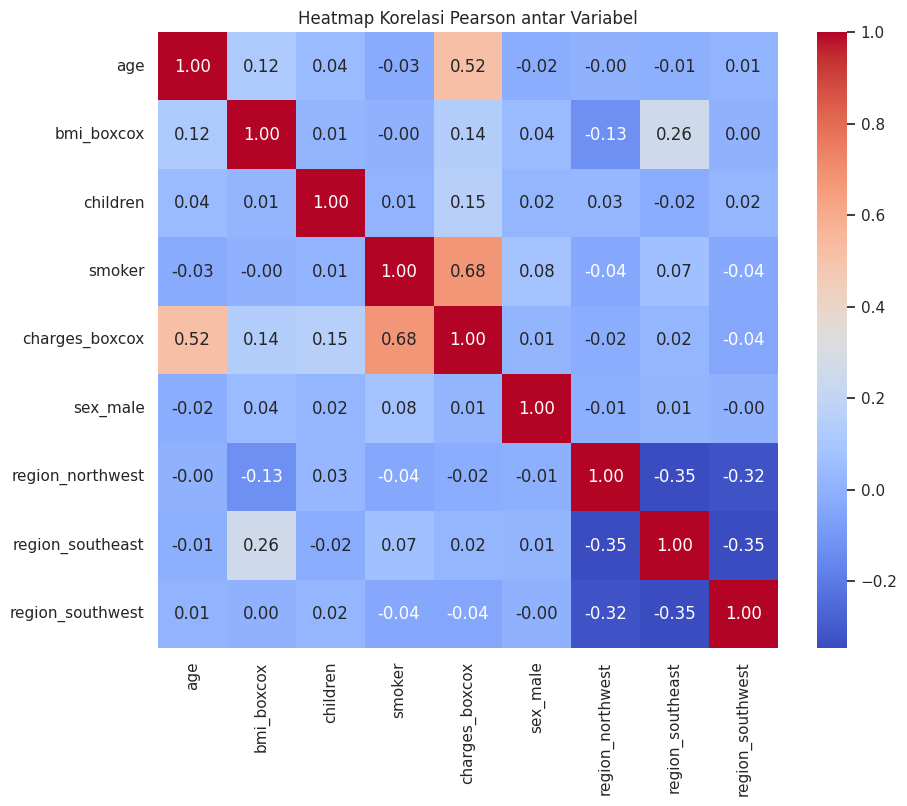

In [ ]:
# Hitung matriks korelasi dengan metode Pearson
correlation_matrix = data_baru.corr(method='pearson')

# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pearson antar Variabel")
plt.show()

Dapat dilihat bahwa terdapat 2 variabel yang berkorelasi tinggi dengan charges, yaitu kolom "Age" dan "Smoker"

In [ ]:
# Membuat peringkat korelasi
correlation_matrix = data_baru.corr(method='pearson')
correlation_with_charges = correlation_matrix['charges_boxcox'].abs().sort_values(ascending=False)
print(correlation_with_charges)

charges_boxcox     1.00
smoker             0.68
age                0.52
children           0.15
bmi_boxcox         0.14
region_southwest   0.04
region_southeast   0.02
region_northwest   0.02
sex_male           0.01
Name: charges_boxcox, dtype: float64


In [ ]:
# drop kolom yang tidak berkorelasi dengan label
data_baru = data_baru.drop(columns=['children', 'region_southwest', 'region_northwest', 'region_southeast', 'bmi_boxcox', 'sex_male'])

In [ ]:
data_baru

,age,smoker,charges_boxcox
0,19,1,12.11
1,18,0,8.80
2,28,0,10.14
3,33,0,12.52
4,32,0,9.93
...,...,...,...
1333,50,0,11.41
1334,18,0,9.14
1335,18,0,8.72
1336,21,0,9.01


##Standarisasi Data##

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Menyekalakan semua kolom di dataframe
data_scaled = scaler.fit_transform(data_baru)

# Menetapkan kembali nilai-nilai yang diskalakan ke DataFrame asli
data_baru.loc[:,:] = data_scaled

# Menampilkan hasil modifikasi DataFrame
data_baru.head()

,age,smoker,charges_boxcox
0,0.02,1.00,0.65
1,0.00,0.00,0.10
2,0.22,0.00,0.32
3,0.33,0.00,0.72
4,0.30,0.00,0.29


Karena tadi diheatmap hanya 2 variabel yang mempunyai korelasi tertinggi dengan charges, maka variabel tersebut sebagai X dan charges sebagai y.

# Feature Selection

In [ ]:
# Memilih kolom "age" dan "smoker" sebagai fitur (X)
X = data_baru[['age', 'smoker']]

# Memilih kolom "charges" sebagai variabel target (y)
y = data_baru['charges_boxcox']

In [ ]:
X

,age,smoker
0,0.02,1.00
1,0.00,0.00
2,0.22,0.00
3,0.33,0.00
4,0.30,0.00
...,...,...
1333,0.70,0.00
1334,0.00,0.00
1335,0.00,0.00
1336,0.07,0.00


In [ ]:
y

0      0.65
1      0.10
2      0.32
3      0.72
4      0.29
       ... 
1333   0.53
1334   0.16
1335   0.09
1336   0.13
1337   0.79
Name: charges_boxcox, Length: 1333, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Split data training dan testing 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=152)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 933 rows
Test Set: 400 rows


Saya menggunakan Lazypredict untuk mempermudah serta menghemat waktu dalam pemilihan model

In [ ]:
# Install library lazypredict
!pip install lazypredict

# Import LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Inisialisasi LazyRegressor
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Tampilkan hasil
print(models)

100%|██████████| 42/42 [00:02<00:00, 20.24it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 2
[LightGBM] [Info] Start training from score 0.496410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# Modelling & Evaluasi Model

In [ ]:
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Inisialisasi K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# Fungsi evaluasi model
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"{name} Evaluation:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}%")
    print("\n")

# Fungsi untuk menampilkan hasil sebelum dan sesudah K-Fold
def evaluate_before_after_kfold(model, X_train, y_train, X_test, y_test):
    # Sebelum K-Fold
    print("Before K-Fold:")
    model.fit(X_train, y_train)
    y_pred_before = model.predict(X_test)
    evaluate_model(model.__class__.__name__, y_test, y_pred_before)

    # Setelah K-Fold
    print("After K-Fold:")
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=Warning)
        scores = cross_val_score(model, X_train, y_train, cv=kf, verbose=0)

    print(f"{model.__class__.__name__} Evaluation After K-Fold:")

    # Evaluasi tambahan
    model.fit(X_train, y_train)
    y_pred_after = model.predict(X_test)
    r2_after = r2_score(y_test, y_pred_after)
    mse_after = mean_squared_error(y_test, y_pred_after)
    rmse_after = np.sqrt(mse_after)
    mae_after = mean_absolute_error(y_test, y_pred_after)
    mape_after = mean_absolute_percentage_error(y_test, y_pred_after)
    print(f"R-squared After K-Fold: {r2_after:.4f}")
    print(f"Mean Squared Error After K-Fold: {mse_after:.4f}")
    print(f"Root Mean Squared Error After K-Fold: {rmse_after:.4f}")
    print(f"Mean Absolute Error After K-Fold: {mae_after:.4f}")
    print(f"Mean Absolute Percentage Error After K-Fold: {mape_after:.4f}%")
    print("\n")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)
evaluate_before_after_kfold(gb_model, X_train, y_train, X_test, y_test)

# HistGradientBoosting Regressor
hist_gb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=3, random_state=100)
evaluate_before_after_kfold(hist_gb_model, X_train, y_train, X_test, y_test)

# Gaussian Process Regressor
gp_model = GaussianProcessRegressor()
evaluate_before_after_kfold(gp_model, X_train, y_train, X_test, y_test)

# Extra Tree Regressor
et_model = ExtraTreesRegressor(n_estimators=100, max_depth=3, random_state=100)
evaluate_before_after_kfold(et_model, X_train, y_train, X_test, y_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=100)
evaluate_before_after_kfold(dt_model, X_train, y_train, X_test, y_test)

# Membuat model ensemble
ensemble_models = [
    ('Gradient Boosting', gb_model),
    ('HistGradientBoosting', hist_gb_model),
    ('Gaussian Process', gp_model),
    ('Extra Trees', et_model),
    ('Decision Tree', dt_model)
]

# Sebelum K-Fold ensemble
print("Ensemble Before K-Fold:")
ensemble_model = VotingRegressor(estimators=ensemble_models, weights=[0.3, 0.6, 0.7, 0.1, 0.1])
ensemble_model.fit(X_train, y_train)
y_pred_ensemble_before = ensemble_model.predict(X_test)
evaluate_model("Ensemble", y_test, y_pred_ensemble_before)

# Setelah K-Fold ensemble
print("Ensemble After K-Fold:")
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    scores_ensemble = cross_val_score(ensemble_model, X_train, y_train, cv=kf, verbose=0)
    print(f"CV Scores: {scores_ensemble}")
    print(f"Mean CV Score: {scores_ensemble.mean()}")
    # Evaluasi tambahan
    y_pred_ensemble_after = ensemble_model.predict(X_test)
    r2_ensemble_after = r2_score(y_test, y_pred_ensemble_after)
    mse_ensemble_after = mean_squared_error(y_test, y_pred_ensemble_after)
    rmse_ensemble_after = np.sqrt(mse_ensemble_after)
    mae_ensemble_after = mean_absolute_error(y_test, y_pred_ensemble_after)
    mape_ensemble_after = mean_absolute_percentage_error(y_test, y_pred_ensemble_after)
    print(f"R-squared After K-Fold Ensemble: {r2_ensemble_after:.4f}")
    print(f"Mean Squared Error After K-Fold Ensemble: {mse_ensemble_after:.4f}")
    print(f"Root Mean Squared Error After K-Fold Ensemble: {rmse_ensemble_after:.4f}")
    print(f"Mean Absolute Error After K-Fold Ensemble: {mae_ensemble_after:.4f}")
    print(f"Mean Absolute Percentage Error After K-Fold Ensemble: {mape_ensemble_after:.4f}%")
    print("\n")

Before K-Fold:
GradientBoostingRegressor Evaluation:
R-squared: 0.7719
Mean Squared Error: 0.0122
Root Mean Squared Error: 0.1105
Mean Absolute Error: 0.0731
Mean Absolute Percentage Error: 0.9379%


After K-Fold:
GradientBoostingRegressor Evaluation After K-Fold:
R-squared After K-Fold: 0.7719
Mean Squared Error After K-Fold: 0.0122
Root Mean Squared Error After K-Fold: 0.1105
Mean Absolute Error After K-Fold: 0.0731
Mean Absolute Percentage Error After K-Fold: 0.9379%


Before K-Fold:
HistGradientBoostingRegressor Evaluation:
R-squared: 0.7737
Mean Squared Error: 0.0121
Root Mean Squared Error: 0.1100
Mean Absolute Error: 0.0728
Mean Absolute Percentage Error: 0.9241%


After K-Fold:
HistGradientBoostingRegressor Evaluation After K-Fold:
R-squared After K-Fold: 0.7737
Mean Squared Error After K-Fold: 0.0121
Root Mean Squared Error After K-Fold: 0.1100
Mean Absolute Error After K-Fold: 0.0728
Mean Absolute Percentage Error After K-Fold: 0.9241%


Before K-Fold:
GaussianProcessRegresso

Dari hasil output yang diberikan, kita dapat melihat bahwa setiap model regressi memiliki performa yang berbeda sebelum dan setelah dilakukan validasi silang (K-Fold). Berikut adalah analisis singkatnya:

1. **Gradient Boosting Regressor**: Model ini memiliki kinerja yang stabil sebelum dan setelah validasi silang dengan R-squared sebesar 0.7719 dan 0.7719 secara berturut-turut. Hal ini menunjukkan bahwa model ini cukup konsisten dalam melakukan prediksi.

2. **HistGradientBoosting Regressor**: Mirip dengan Gradient Boosting Regressor, model ini juga menunjukkan kinerja yang stabil dengan R-squared sebesar 0.7737 sebelum dan setelah validasi silang.

3. **Gaussian Process Regressor**: Model ini juga menunjukkan kinerja yang stabil dengan R-squared sebesar 0.7742 sebelum dan setelah validasi silang. Meskipun nilai MAPE-nya sedikit lebih tinggi setelah validasi silang, performanya secara keseluruhan tetap konsisten.

4. **Extra Trees Regressor** dan **Decision Tree Regressor**: Kedua model ini memiliki kinerja yang sedikit lebih rendah dibandingkan model-model lainnya, dengan R-squared sebesar 0.7591 dan 0.7486 secara berturut-turut sebelum dan setelah validasi silang. Ini menunjukkan bahwa model ini mungkin cenderung overfitting atau memiliki kompleksitas yang kurang sesuai dengan data.

5. **Ensemble Model (VotingRegressor)**: Sebelum validasi silang, model ensemble menunjukkan peningkatan performa dengan R-squared sebesar 0.7745. Setelah validasi silang, kinerjanya tetap konsisten dengan CV Scores yang meningkat dan R-squared yang tetap stabil di 0.7745. Dengan demikian, model ensemble menunjukkan kinerja yang baik dan konsisten dalam memprediksi data.

Kesimpulannya, model ensemble (VotingRegressor) adalah yang terbaik karena mampu menggabungkan prediksi dari beberapa model dengan kinerja yang beragam dan menghasilkan prediksi yang stabil dan akurat. Dengan memanfaatkan kekuatan dari masing-masing model individu, model ensemble mampu memberikan hasil yang lebih baik daripada model tunggal secara individual.

## Visualisasi Model Ensemble

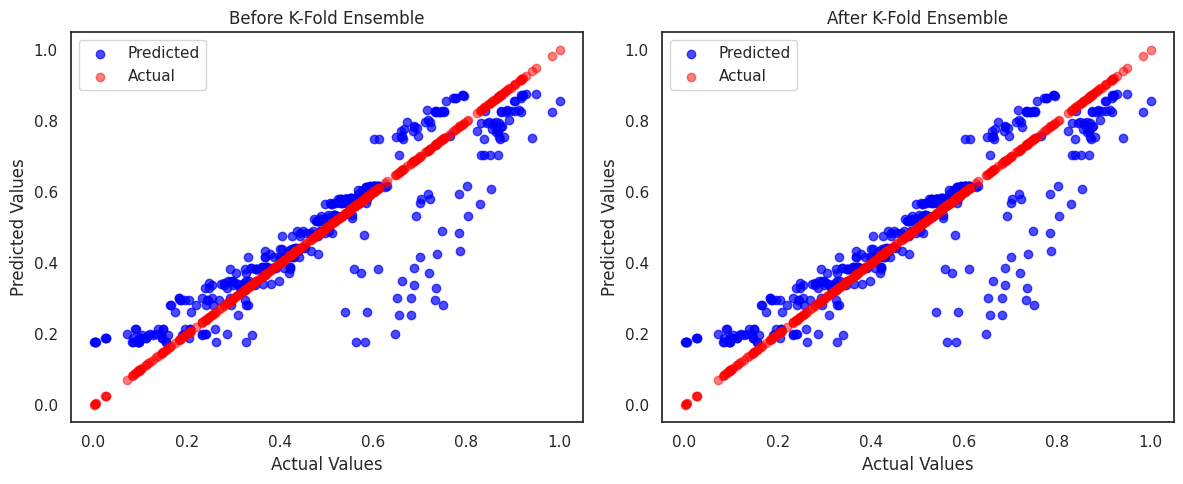

In [ ]:
def visualize_prediction(y_actual, y_pred1, title1, y_pred2=None, title2=None):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_actual, y_pred1, color='blue', label='Predicted', alpha=0.7)
    plt.scatter(y_actual, y_actual, color='red', label='Actual', alpha=0.5)
    plt.title(title1)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()

    if y_pred2 is not None and title2 is not None:
        plt.subplot(1, 2, 2)
        plt.scatter(y_actual, y_pred2, color='blue', label='Predicted', alpha=0.7)
        plt.scatter(y_actual, y_actual, color='red', label='Actual', alpha=0.5)
        plt.title(title2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Visualisasi sebelum dan sesudah K-Fold ensemble dalam satu gambar
visualize_prediction(y_test, y_pred_ensemble_before, "Before K-Fold Ensemble", y_pred_ensemble_after, "After K-Fold Ensemble")

Gambar tersebut menampilkan dua plot sebaran yang membandingkan nilai prediksi dengan nilai aktual, satu sebelum dan satu setelah menerapkan teknik K-Fold Ensemble. Dari plot tersebut, kita dapat mengamati dan menyimpulkan hal-hal berikut:

1. Sebelum K-Fold Ensemble:
   - Titik-titik data tersebar di sekitar garis diagonal, menunjukkan adanya korelasi antara nilai prediksi dan aktual.
   - Namun, terdapat penyebaran titik data yang cukup signifikan, menunjukkan penyimpangan antara nilai prediksi dan aktual untuk banyak contoh.
   - Pola sebaran ini menunjukkan bahwa model awal masih memiliki ruang untuk perbaikan dalam hal akurasi prediksi.

2. Setelah K-Fold Ensemble:
   - Titik-titik data lebih mengelompok di sekitar garis diagonal, menunjukkan keselarasan yang lebih baik antara nilai prediksi dan aktual.
   - Penyebaran titik data telah berkurang, menunjukkan bahwa teknik K-Fold Ensemble telah meningkatkan akurasi prediksi secara keseluruhan.
   - Peningkatan terutama terlihat pada rentang nilai yang lebih rendah dan lebih tinggi, di mana titik-titik data sekarang jauh lebih dekat dengan garis diagonal.

**Kesimpulan**:
Perbandingan antara dua plot sebaran dengan jelas menunjukkan bahwa penerapan teknik K-Fold Ensemble telah secara signifikan meningkatkan kinerja prediksi model. Pendekatan K-Fold Ensemble telah efektif mengurangi penyimpangan antara nilai prediksi dan aktual, menghasilkan prediksi yang lebih akurat di seluruh rentang nilai. Peningkatan akurasi prediksi ini dapat dikaitkan dengan kemampuan teknik ensemble untuk menggabungkan beberapa model dan memanfaatkan kekuatan kolektif mereka, menghasilkan prediksi yang lebih kuat dan andal.

# Saran dan Rekomendasi

Saran dan rekomendasi terkait hasil prediksi asuransi kesehatan dapat membantu perusahaan untuk meningkatkan strategi bisnis. Berikut adalah beberapa saran yang dapat dipertimbangkan:

- **Pricing Strategy** :
Sesuaikan strategi penetapan harga (pricing) untuk produk asuransi kesehatan berdasarkan temuan bahwa charges meningkat seiring dengan bertambahnya usia dan perokok memiliki charges yang lebih tinggi. Ini bisa mencakup menetapkan premi yang lebih tinggi untuk kelompok usia yang lebih tua dan perokok.

- **Segmentasi Pelanggan** :
Lakukan segmentasi pelanggan berdasarkan informasi umur dan status perokok. Kenali dan pahami profil pelanggan yang berbeda untuk dapat menawarkan produk asuransi kesehatan yang lebih sesuai dengan kebutuhan dan kemampuan membayar masing-masing segmen.

- **Campaign** :
Jalankan campaign atau penjualan khusus untuk kelompok yang diidentifikasi sebagai berisiko tinggi, seperti perokok atau kelompok usia tertentu. Tawarkan insentif atau manfaat tambahan untuk menarik perhatian pelanggan dalam segmen ini.

- **Penilaian Risiko Lebih Lanjut** :
Lakukan analisis lebih lanjut untuk mengevaluasi faktor-faktor risiko lainnya yang mungkin mempengaruhi charges. Hal ini dapat mencakup variabel tambahan seperti riwayat medis atau gaya hidup. Mengetahui faktor-faktor ini dapat meningkatkan akurasi model.

- **Personalisasi Produk** :
Tingkatkan personalisasi produk asuransi kesehatan. Berdasarkan informasi umur dan status perokok, Kita dapat menyusun paket-paket asuransi yang lebih sesuai dengan kebutuhan dan profil risiko masing-masing pelanggan.